<a href="https://colab.research.google.com/github/Dhormir/PotatoMachine-Taller1/blob/main/Parte%201/DomingoBenoit-TomasBerrios_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>

**Integrantes**


*   Domingo Benoit
*   Tomás Berríos



**Temas**  

* Clasificadores Discriminativos Clásicos
* Clasificadores Generativos Clásicos
* Regresión Lineal y Regularización 
* Selección de Características (parcial, seguiremos en T2)
* Reducción de Dimensionalidad


<hr style="height:2px;border:none"/>


**Instrucciones:** 

* Pueden trabajar en equipos de 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)

* Pueden reusar código visto en clases o recolectado de otros sitios mencionando al autor e indicando la fuente.

* Formato de entrega:

> * Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada , los resultados obtenidos y las conclusiones de la experiencia. 

> * Se debe enviar un link Github o jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Si se entrega el código fuente en un formato distinto a un notebook con comentarios, favor proveer instrucciones básicas para el uso.

> * Fecha de encuentro Zoom: 6 de noviembre, horario de clases.
> * Fecha de entrega de vídeo: 4 de noviembre (2 días antes de encuentro).
> * Fecha de entrega de Jypter (notebook): 4 de noviembre (commits hasta el 6 de noviembre en horario de clases). 

> * Presentación Online (Zoom): El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamnete algunos equipos que presentarán ante todo el curso. Los autores serán evaluados tanto por su trabajo como por la discusión y debate que generen entre sus pares.

<hr style="height:2px;border:none"/>


La tarea se divide en dos secciones:

[1.](#primero) **Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

La metodología debiese incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos diseñados por ustedes. Por ejemplo, un problema donde se crea una variable dummy irrelevante para demostrar que un método logra eliminarla o un dataset donde la cantidad de datos faltantes se vaya modificando. Experimentos de este último tipo, que alteran un dataset real contarán como realizados sobre "dataset reales".

Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un analisis exploratorio detallado de cada dataset utilizado.

[2.](#segundo) **Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío de aprendizaje automático en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados.



#### <a id="primero"></a>
## 1. **Pregunta de Investigación**

Reuna evidencia experimental para refutar o sostener una de las siguientes afirmaciones:

> 
> **8. Clases Desbalanceadas**: Un desbalance en la cantidad de ejemplos por clase afecta mucho más el desempeño de un clasificador discriminativo que el desempeño de un clasificador generativo, ya que en este último caso es posible ajustar manualmente los *a-priori* para corregir la situación.




# 1. **Pregunta de Investigación**

**8. Clases Desbalanceadas**: Un desbalance en la cantidad de ejemplos por clase afecta mucho más el desempeño de un clasificador discriminativo que el desempeño de un clasificador generativo, ya que en este último caso es posible ajustar manualmente los *a-priori* para corregir la situación.

# Titanic Dataset


In [10]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/MA_datasets/taller1-ml-usm-2020/"#Esta es la ruta

nameTrain = 'titanictrain.csv'
nameTest = 'titanictest.csv'

Mounting your Google Drive ...
Mounted at /content/drive




Attribute Information:  
1 - Survived.  
2 - Pclass.  
3 - Sex.  
4 - Age.  
5 - SibSp.  
6 - Parch.  
7 - Fare.  
8 - Embarked.  

*Atributos a utilizar para el modelo*

## Exploratorio
Buscamos predecir la supervivencia de acuerdo a los atributos predictores entregados por lo cual primero realizamos un analisis de los atributos en pos de la supervivencia. 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



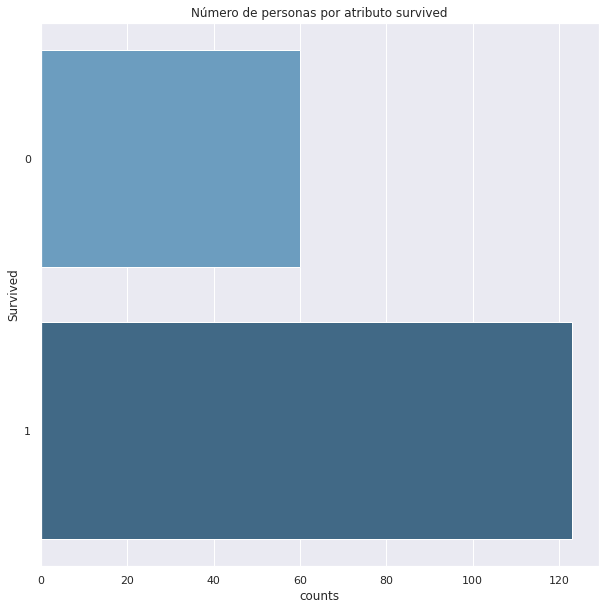

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

data = pd.read_csv(path+nameTrain, sep=',')
data = data.dropna()

print("")
print( data.columns)
print("")


gr = data.groupby(['Survived']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10,10),nrows=1)
sns.barplot(data=gr, y='Survived', x='counts', palette="Blues_d", ax=ax, orient="h" )
ax.set_title('Número de personas por atributo survived')
plt.show()

Se quitan los atributos que no influyen o que presentan gran cantidad de *nan* como 'Name' y 'Cabin'.

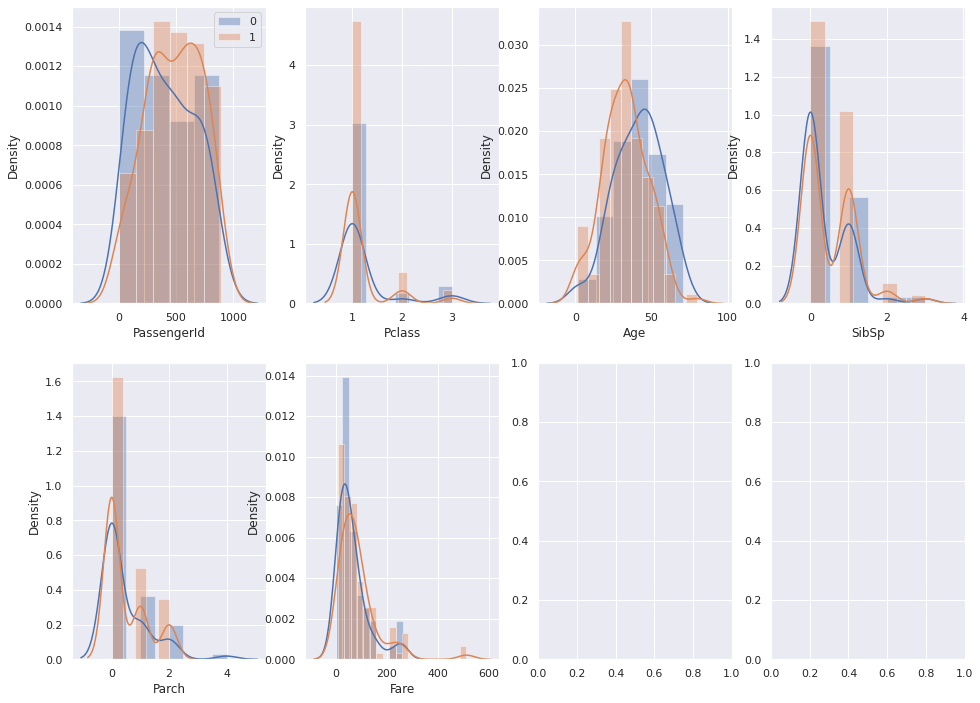

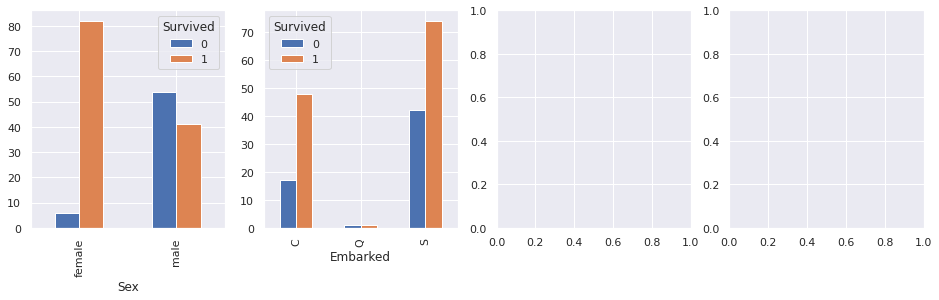

In [11]:
cont_predictors_names = ['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
cat_predictors = ['Sex', 'Embarked']
other_predictors = ['Name', 'Cabin', 'Survived']

qualities = [0, 1]

fig, axes = plt.subplots(figsize=(16,12), nrows=2, ncols=4)
for i, column in enumerate(cont_predictors_names):
    for quality in qualities:
      target = data.loc[data['Survived'] == quality]
      sns.distplot(target[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=quality)
      if i==0:
        axes[0,0].legend()

plt.show()

fig, axes = plt.subplots(figsize=(16,4), nrows=1, ncols=4)
for i, column in enumerate(cat_predictors):
  df_gb = data.groupby([column, 'Survived']).size().unstack(level=1)
  df_gb.plot(kind = 'bar',ax=axes[i%4])

plt.show()

Revisamos la distribución de los datos y los limpiamos de la dispersión:

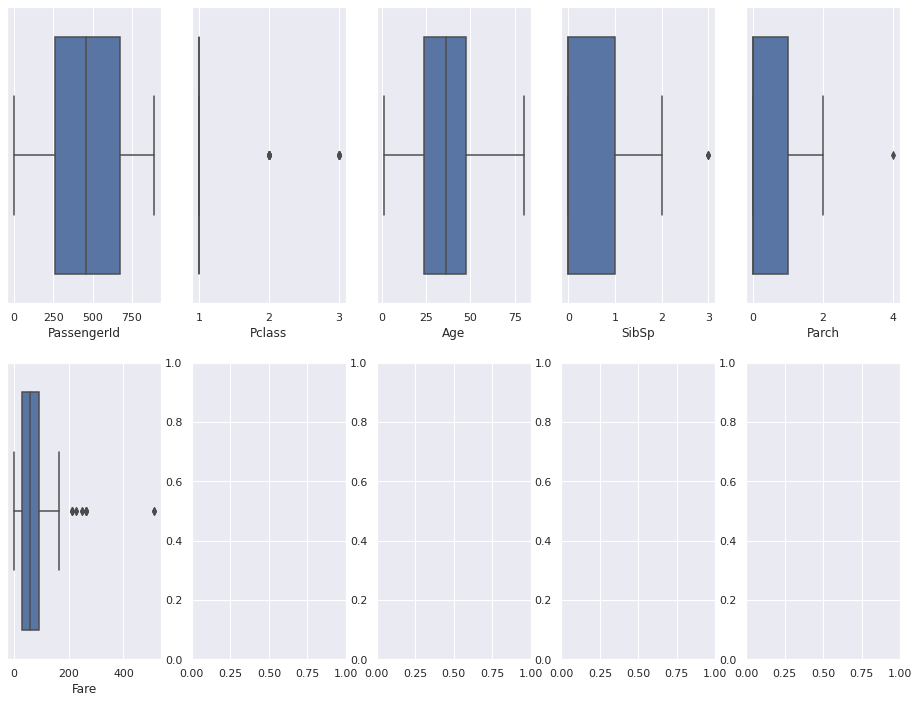

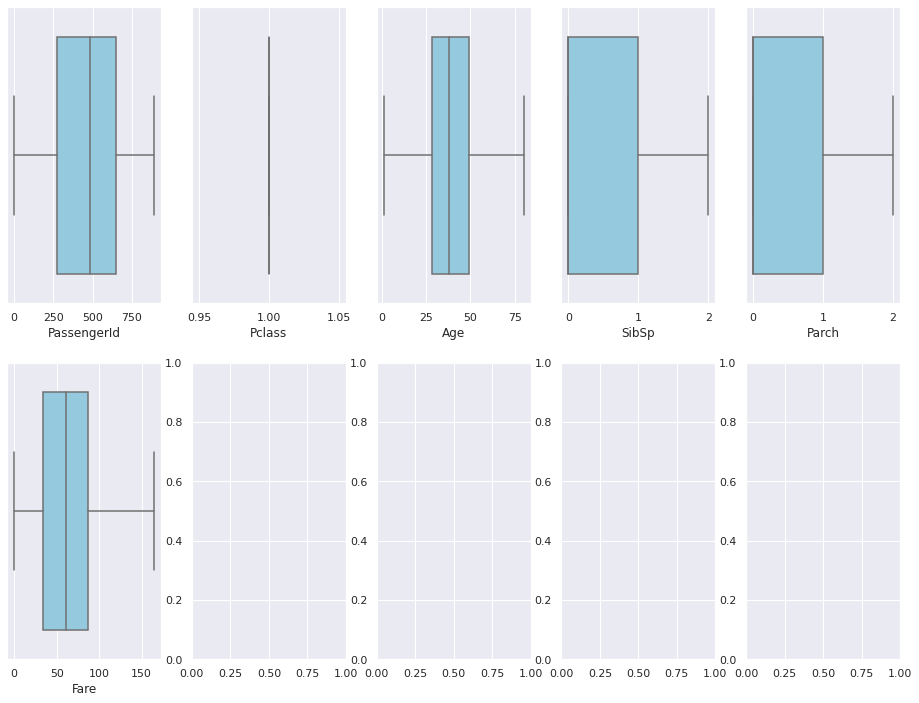

In [ ]:

fig, axes = plt.subplots(figsize=(16,12), nrows=2, ncols=5)
for i, column in enumerate(cont_predictors_names):
      sns.boxplot(x=data[column], ax=axes[i//5,i%5])

plt.show()

Q1 = data[cont_predictors_names].quantile(0.25)
Q3 = data[cont_predictors_names].quantile(0.75)
IQR = Q3 - Q1

filter = ((data[cont_predictors_names] < (Q1 - 1.5 * IQR)) | (data[ cont_predictors_names] > (Q3 + 1.5 * IQR))).any(axis=1)

data_filtered = data[~filter].copy()
fig, axes = plt.subplots(figsize=(16,12), nrows=2, ncols=5)
for i, column in enumerate(cont_predictors_names):
      sns.boxplot(x=data_filtered[column], ax=axes[i//5,i%5], color="skyblue")

plt.show()

## Pre-procesamiento

In [12]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data['Sex']= le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

###One Hot Encoding

###Upsampling

In [ ]:
from sklearn.utils import resample


df_clases = []
for i in range(3, 9):
  df_clases.append(data[data.quality==i])


for df in df_clases:
  print(df.quality.value_counts())

df_clases_min_upsampled = []
for i in range(3, 9):
    df_clases_min_upsampled.append(resample(df_clases[i - 3], 
                                    replace=True,     # sample with replacement
                                    n_samples=681,    # to match majority class
                                    random_state=123) # reproducible results
    )

df_upsampled = pd.concat(df_clases_min_upsampled)
print(df_upsampled.quality.value_counts())

3    10
Name: quality, dtype: int64
4    53
Name: quality, dtype: int64
5    681
Name: quality, dtype: int64
6    638
Name: quality, dtype: int64
7    199
Name: quality, dtype: int64
8    18
Name: quality, dtype: int64
7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64


###Downsampling

Esto es utilizado para balancear y desbalancear las clases

In [14]:
from sklearn.utils import resample


df_clases = []
for i in range(2):
  df_clases.append(data[data.Survived==i])


for df in df_clases:
  print(df.Survived.value_counts())

df_clases_min_downsampled = []
for i in range(2):
  if i == 1:
    df_clases_min_downsampled.append(resample(df_clases[i], 
                                    replace=False,     # sample with replacement
                                    n_samples=int(np.round(60*1)),    # to match majority class
                                    random_state=123) # reproducible results
    )
  else:
    df_clases_min_downsampled.append(df_clases[i])

df_downsampled = pd.concat(df_clases_min_downsampled)
print(df_downsampled.Survived.value_counts())

0    60
Name: Survived, dtype: int64
1    123
Name: Survived, dtype: int64
1    60
0    60
Name: Survived, dtype: int64


###Sets de Testeo, entrenamiento y validacón.
Separamos datos de testeo entrenamiento y validación.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#cont_features = df_upsampled[cont_predictors_names]
cont_features = df_downsampled[cont_predictors_names]
#cont_features = data[cont_predictors_names + cat_predictors]

X = cont_features.values
#y = df_upsampled['Survived'].values
y = df_downsampled['Survived'].values
#y = data['Survived'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train,
                                                   test_size=0.4,
                                                   random_state=0)

print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

scaler = StandardScaler()
#Z = X-mu/sigma

#X_train[cont_predictors_names] = scaler.fit_transform(X_train[cont_predictors_names])
#X_val[cont_predictors_names] = scaler.transform(X_val[cont_predictors_names])
#X_test[cont_predictors_names] = scaler.transform(X_test[cont_predictors_names])

X,y Shapes: (120, 6) (120,)
X,y Train Shapes: (57, 6) (57,)
X,y Val Shapes: (39, 6) (39,)
X,y Test Shapes: (24, 6) (24,)


## Clasificadores Discriminativos
Entrenamos y mostramos las metricas de desempeño relacionadas con el problema.

In [ ]:
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import f1_score, recall_score, precision_score

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max


baseP = Perceptron(tol=1e-3,eta0=0.1,random_state=MAX_INT)
baseLR = LogisticRegression()

classifiers = {#"Perceptron + OVR": OneVsRestClassifier(baseP),
               #"Perceptron + OVO": OneVsOneClassifier(baseP),
               "LR Directo": LogisticRegression(),
               "Gaussian NB": GaussianNB(),
               "Gaussian NB a-priori ajustado": GaussianNB(priors=apriori)}#, 
               #"LR + OVR": OneVsRestClassifier(baseLR),
               #"LR + OVO": OneVsOneClassifier(baseLR)}


print("N CLASES = %d\n"%n_classes)
#cv_scores = {}

fig, ax1 = plt.subplots(figsize=(18,5),nrows=1)
fig, ax2 = plt.subplots(figsize=(18,5),nrows=1)

for key in classifiers.keys():
  clf = classifiers[key].fit(X_train, y_train)

  #cv_scores[key] = []
  #cv_scores[key].append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
  #print("{} cv score: {}".format(key, cv_scores[key]))
  train_acc = clf.score(X_train, y_train)
  val_acc = clf.score(X_val, y_val)
  test_acc = clf.score(X_test, y_test)

  print("\nTrain/Val/Test Accuracy Multiclass (via {})\n".format(key))
  print(train_acc,val_acc,test_acc)

  #fig, ax = plt.subplots(figsize=(10, 10))
  #labels = [idx for idx in range(n_classes)]
  #disp = plot_confusion_matrix(clf, X_test, y_test,
  #                            display_labels=labels, cmap=plt.cm.Blues,
  #                            normalize='true',ax=ax)
  #disp.ax_.set_title("Confusion Matrix {}".format(key))

  scores_val = clf.predict_proba(X_val)[:,1]
  labels = clf.classes_
  pos_class = labels[0]

  fpr_binary, tpr_binary, thresholds_binary = roc_curve(y_val, scores_val, pos_label=pos_class)
  ax2.plot(fpr_binary, tpr_binary, label=key)
  precision_binary, recall_binary, thrs_binary = precision_recall_curve(y_val, scores_val, pos_label=pos_class)
  ax1.plot(recall_binary, precision_binary, label=key)

  auc_binary = auc(fpr_binary, tpr_binary)
  aupr_binary = average_precision_score(y_val, scores_val, pos_label=pos_class)

  print("\n Positive Class is: %s"%pos_class)
  print("AUC is %f"%auc_binary)
  print("AUPR is %f"%aupr_binary)
  y_pred_test = clf.predict(X_test)
  print("Accuracy Score: {}".format(accuracy_score(y_pred_test, y_test)))
  print("Clases predecidas: {}".format(np.unique(y_pred_test)))
  print(f"Classifier Report {key} : \n\n {classification_report(y_test, y_pred_test)}")

  #acc[key] = []
  #AUPR[key] = []
  #AUC[key] = []

  #acc[key].append(accuracy_score(y_pred_test, y_test))
  #AUPR[key].append(aupr_binary)
  #AUC[key].append(auc_binary)

ax2.set_title("ROC Curve")
ax2.set_xlabel("False Positive Rate (1-Especificidad)")
ax2.set_ylabel("True Positive Rate (Recall)")

ax1.set_title("PR Curve")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Recall")
ax1.legend(loc='best')
plt.show()

In [18]:
acc = {}
AUPR = {}
AUC = {}

{'LR Directo': [0.5, 0.782608695652174, 0.43478260869565216, 0.6818181818181818, 0.7142857142857143, 0.6666666666666666, 0.7, 0.6, 0.8421052631578947, 0.7777777777777778, 0.8333333333333334, 0.6470588235294118, 0.7647058823529411, 0.625, 0.8666666666666667], 'Gaussian NB': [0.4583333333333333, 0.5652173913043478, 0.5217391304347826, 0.5, 0.7142857142857143, 0.5238095238095238, 0.35, 0.55, 0.7894736842105263, 0.7777777777777778, 0.7777777777777778, 0.7647058823529411, 0.7647058823529411, 0.8125, 0.4], 'Gaussian NB a-priori ajustado': [0.4583333333333333, 0.5652173913043478, 0.5217391304347826, 0.5454545454545454, 0.7142857142857143, 0.47619047619047616, 0.45, 0.6, 0.47368421052631576, 0.6111111111111112, 0.8333333333333334, 0.8235294117647058, 0.6470588235294118, 0.6875, 0.26666666666666666]}
{'LR Directo': [0.4697378745441264, 0.6084104106817414, 0.5722821934988882, 0.6192007522612023, 0.5231527097059424, 0.47322045378949873, 0.48453350777651216, 0.6072294562263646, 0.5438060282500872,

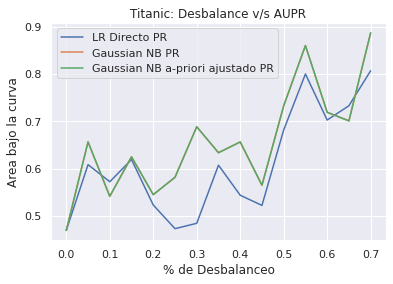

In [ ]:
print(acc)
print(AUPR)
print(AUC)

for key in classifiers.keys():
  plt.plot(np.arange(0, 1, 0.05)[:-5], AUPR[key], label=key+" PR")

plt.title("Titanic: Desbalance v/s AUPR")
plt.xlabel("% de Desbalanceo")
plt.ylabel("Area bajo la curva")
plt.legend(loc='best')
plt.show()


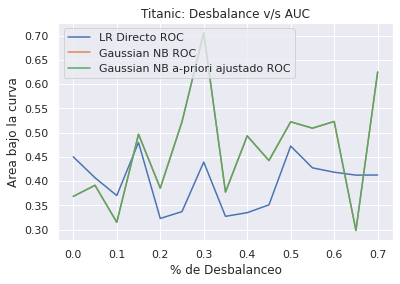

In [ ]:
for key in classifiers.keys():
  plt.plot(np.arange(0, 1, 0.05)[:-5], AUC[key], label=key+" ROC")

plt.title("Titanic: Desbalance v/s AUC")
plt.xlabel("% de Desbalanceo")
plt.ylabel("Area bajo la curva")
plt.legend(loc='best')
plt.show()

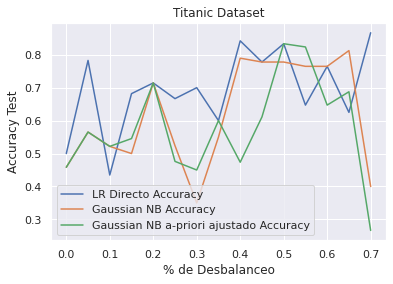

In [ ]:
for key in classifiers.keys():
  plt.plot(np.arange(0, 1, 0.05)[:-5], acc[key], label=key+" Accuracy")

plt.title("Titanic Dataset")
plt.xlabel("% de Desbalanceo")
plt.ylabel("Accuracy Test")
plt.legend(loc='best')
plt.show()

## Clasificadores Generativos

### Naive Bayes

In [17]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB, GaussianNB

n_classes = len(np.unique(y_train))
MAX_INT = np.iinfo(np.int32).max

apriori = [60/183, 123/183]

classifiers = {"Gaussian NB": GaussianNB(),
               "Gaussian NB a-priori ajustado": GaussianNB(priors=apriori)}#,
               #"Multinomial NB": MultinomialNB(alpha=1),
               #"Multinomial NB a-priori ajustado": MultinomialNB(alpha=1, class_prior=apriori),
               #"ComplementNB": ComplementNB(alpha=1),
               #"ComplementNB a-priori ajustado": ComplementNB(alpha=1, class_prior=apriori)}

print("N CLASES = %d\n"%n_classes)
#cv_scores = {}
for key in classifiers.keys():
  clf = classifiers[key].fit(X_train, y_train)


  #cv_scores[key] = []
  cv_scores[key].append(np.mean(cross_val_score(clf, X_train, y_train, cv=5)))
  print("{} cv score: {}".format(key, np.mean(cv_scores[key])))
  train_acc = clf.score(X_train, y_train)
  val_acc = clf.score(X_val, y_val)
  test_acc = clf.score(X_test, y_test)

  print("\nTrain/Val/Test Accuracy Multiclass (via {})\n".format(key))
  print(train_acc,val_acc,test_acc)
  print("\n")

  fig, ax = plt.subplots(figsize=(10, 10))
  labels = [idx for idx in range(n_classes)]
  disp = plot_confusion_matrix(clf, X_test,y_test,
                              display_labels=labels, cmap=plt.cm.Blues,
                              normalize='true',ax=ax)
  disp.ax_.set_title("Confusion Matrix {}".format(key))


  y_pred_test = clf.predict(X_test)
  print("Accuracy Score: {}".format(accuracy_score(y_pred_test, y_test)))
  print("Clases predecidas: {}".format(np.unique(y_pred_test)))
  print(f"Classifier Report {key}: \n\n {classification_report(y_test, y_pred_test)}")

N CLASES = 2



NameError: ignored

In [ ]:
print(cv_scores.keys())

dict_keys(['Perceptron + OVR', 'Perceptron + OVO', 'LR Directo', 'LR + OVR', 'LR + OVO', 'Gaussian NB', 'Gaussian NB a-priori ajustado', 'Multinomial NB', 'Multinomial NB a-priori ajustado', 'ComplementNB', 'ComplementNB a-priori ajustado'])


## Gráficos

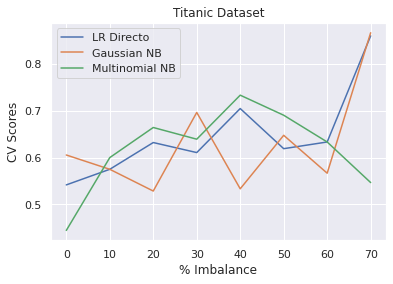

In [ ]:
pImb = [0, 10, 20, 30, 40, 50, 60, 70]
fig = plt.figure()
ax = plt.subplot(111)


for key in cv_scores.keys():
  if key in ['LR Directo', 'Gaussian NB', 'Multinomial NB']:
    ax.plot(pImb, cv_scores[key], label=key)

plt.ylabel("CV Scores")
plt.xlabel("% Imbalance")
plt.title("Titanic Dataset")
ax.legend()
plt.show()

#### <a id="segundo"></a>
## 2. **Desafío Kaggle (Mercado Libre)**

> En esta ocasión se utilizará un extracto del dataset usado en la competencia auspiciada por Mercado Libre el año 2019 (https://ml-challenge.mercadolibre.com/), este desafío consiste en predecir la categoría a la que pertenece un anuncio de la página de mercado libre utilizando solamente el título del anuncio.
>
> En el extracto del dataset con el que trabajaremos existen $50$ clases en total las cuales son las que presentaban mayor frecuencia en el conjunto de datos originales.
>
> Para evaluar el desempeño de sus algoritmos se utilizará como métrica __Mean F-Score__, es decir, la media del F1-Score de las $50$ clases.
>
> Pueden modificar las técnicas que hemos estudiado o combinarlas como ustedes deseen, pero para evitar salirnos de contexto sólo podrán usar como modelo base los clasificadores/regresores que hayamos estudiado hasta el momento. En particular el uso de métodos profundos, técnicas basadas en árboles, máquinass de vectores de soporte y KNN no está autorizado. 

>
> Pueden ingresar la competencia en kaggle desde el siguiente link: https://www.kaggle.com/t/81e3b64538d84c058c6bccdcd0f6cb9e




In [ ]:
name = 'train.csv' 